In [13]:
import tensorflow as tf
import numpy as np 
import pandas as pd



#Dataset

In [14]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/preprocessed_dataset.csv', na_values='nan')
df.drop(columns=['Unnamed: 0'], inplace=True)

train_data, test_data = train_test_split(df, random_state=7654, stratify=df['target'])

In [15]:
training_sentences = []
testing_sentences = []
training_labels = train_data['target']
testing_labels = test_data['target']

for t in train_data['text']:
  training_sentences.append(str(t))

for t in test_data['text']:
  testing_sentences.append(str(t))

In [16]:
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)

In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


#Model V0.1

In [18]:
from tensorflow.keras.utils import plot_model

model  = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  # tf.keras.layers.Flatten(),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 164,429
Trainable params: 164,429
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/do

In [19]:
num_epochs = 5
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
# model.fit(padded,
#           training_labels,
#           epochs=num_epochs,
#           validation_data=(testing_padded, testing_labels))
history = model.fit(padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/5
467/467 - 144s - loss: 0.4087 - accuracy: 0.8040 - val_loss: 0.2788 - val_accuracy: 0.8805 - 144s/epoch - 308ms/step
Epoch 2/5
467/467 - 145s - loss: 0.1733 - accuracy: 0.9339 - val_loss: 0.2866 - val_accuracy: 0.8859 - 145s/epoch - 311ms/step
Epoch 3/5


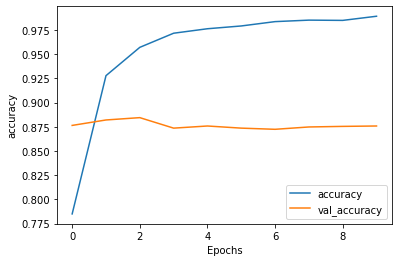

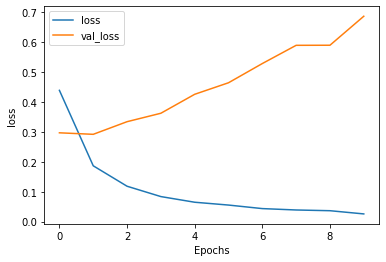

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plt.savefig('lol.png')
plot_graphs(history, "loss")

In [ ]:
pred = (model.predict(testing_padded) > 0.5).astype(int)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim) 

(10000, 16)


In [ ]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

In [ ]:
tf.data.experimental.enable_debug_mode()
sen = ['তোরে চুদি', 'কুত্তার বাচ্চা', 'তুমি ভালো আছো?', 'খানকি মাগি তোর ভাত আর খামু না', 'শুকরের বাচ্চা গুলো ঘুমাচ্ছে']

test_sequences = tokenizer.texts_to_sequences(sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

print(model.predict(test_padded)) 

[[0.99996173]
 [0.9999837 ]
 [0.00948727]
 [0.999992  ]
 [0.8800632 ]]
